In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def analyze_task_costs(app_name, droidagent_result_dir):
    usage_row = []
    with open(os.path.join(droidagent_result_dir, 'exp_data.json')) as f:
        exp_data = json.load(f)

    api_usage = exp_data['API_usage']
    
    usage_row.append({
        'app_name': app_name,
        'gpt-4-prompt-tokens': api_usage['gpt-4-0613']['prompt_tokens'],
        'gpt-4-completion_tokens': api_usage['gpt-4-0613']['completion_tokens'],
        'gpt-3.5-16k-prompt-tokens': api_usage['gpt-3.5-turbo-16k-0613']['prompt_tokens'],
        'gpt-3.5-16k-completion-tokens': api_usage['gpt-3.5-turbo-16k-0613']['completion_tokens'],
    })
    if 'gpt-3.5-turbo-0613' in api_usage:
        usage_row[-1]['gpt-3.5-prompt-tokens'] = api_usage['gpt-3.5-turbo-0613']['prompt_tokens']
        usage_row[-1]['gpt-3.5-completion-tokens'] = api_usage['gpt-3.5-turbo-0613']['completion_tokens']
    else:
        usage_row[-1]['gpt-3.5-prompt-tokens'] = 0
        usage_row[-1]['gpt-3.5-completion-tokens'] = 0

    return usage_row

usage_rows = []
for app_name in os.listdir('../data/'):
    if app_name == "QuickChat":
        continue
    if app_name == '.keep':
        continue
    print(app_name)
    result_path = os.path.join('../data/', app_name)
    task_row = analyze_task_costs(app_name, result_path)
    usage_rows.extend(task_row)

usage_df = pd.DataFrame(usage_rows)


Phonograph
collect
MaterialFB
commons
osmeditor4android
AntennaPod
MyExpenses
AnkiDroid
OpenTracks
Scarlet-Notes
Markor
openlauncher
ActivityDiary
APhotoManager
Omni-Notes


In [4]:
cost_rate_map = {
    'gpt-4-8k': {
        'input': 0.03,
        'output': 0.06
    },
    'gpt-3.5-16k': {
        'input': 0.003,
        'output': 0.004
    },
    'gpt-3.5-4k': {
        'input': 0.0015,
        'output': 0.002
    }
}

In [5]:
usage_df['gpt-3.5-cost'] = (usage_df['gpt-3.5-prompt-tokens'] * cost_rate_map['gpt-3.5-4k']['input'] + usage_df['gpt-3.5-completion-tokens'] * cost_rate_map['gpt-3.5-4k']['output'] + usage_df['gpt-3.5-16k-prompt-tokens'] * cost_rate_map['gpt-3.5-16k']['input'] + usage_df['gpt-3.5-16k-completion-tokens'] * cost_rate_map['gpt-3.5-16k']['output']) / 1000
usage_df['gpt-4-cost'] = (usage_df['gpt-4-prompt-tokens'] * cost_rate_map['gpt-4-8k']['input'] + usage_df['gpt-4-completion_tokens'] * cost_rate_map['gpt-4-8k']['output']) / 1000
usage_df['total-cost'] = usage_df['gpt-3.5-cost'] + usage_df['gpt-4-cost']


In [6]:
usage_df

,app_name,gpt-4-prompt-tokens,gpt-4-completion_tokens,gpt-3.5-16k-prompt-tokens,gpt-3.5-16k-completion-tokens,gpt-3.5-prompt-tokens,gpt-3.5-completion-tokens,gpt-3.5-cost,gpt-4-cost,total-cost
0,Phonograph,304392,21174,1748985,79749,439807,39894,6.305449,10.40220,16.707650
1,collect,406123,30989,2438300,109038,0,0,7.751052,14.04303,21.794082
2,MaterialFB,332063,17622,2202179,74574,676738,51515,8.022970,11.01921,19.042180
3,commons,283515,19354,1640214,73902,306695,28227,5.732747,9.66669,15.399437
4,osmeditor4android,389953,24513,2255038,93023,508371,43298,7.986359,13.16937,21.155729
5,AntennaPod,365024,23713,2189736,72587,677486,56478,7.988741,12.37350,20.362241
6,MyExpenses,350125,22732,2058254,90010,376364,32351,7.164050,11.86767,19.031720
7,AnkiDroid,393146,25480,2292469,106514,545532,47348,8.216457,13.32318,21.539637
8,OpenTracks,322581,22125,1732418,81869,447297,37829,6.271333,11.00493,17.276263
9,Scarlet-Notes,216113,16578,1417558,66410,598966,45795,5.508353,7.47807,12.986423


In [8]:
usage_df.describe()

,gpt-4-prompt-tokens,gpt-4-completion_tokens,gpt-3.5-16k-prompt-tokens,gpt-3.5-16k-completion-tokens,gpt-3.5-prompt-tokens,gpt-3.5-completion-tokens,gpt-3.5-cost,gpt-4-cost,total-cost
count,15.000000,15.000000,1.500000e+01,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000
mean,325224.333333,22131.333333,1.955983e+06,83789.133333,499879.00000,41147.066667,7.035219,11.084610,18.119829
std,52952.429998,3723.946594,3.126767e+05,12427.091671,183082.68163,13860.604035,0.989498,1.778203,2.662672
min,216113.000000,16578.000000,1.417558e+06,66410.000000,0.00000,0.000000,5.508353,7.478070,12.986423
25%,293953.500000,19252.000000,1.702214e+06,74238.000000,443552.00000,38861.500000,6.188777,10.034445,16.107845
50%,329085.000000,22125.000000,1.938697e+06,81869.000000,508371.00000,43298.000000,7.164050,11.076330,18.469598
75%,357574.500000,24113.000000,2.228608e+06,91422.500000,638165.50000,48270.000000,7.987550,12.120585,20.091989
max,406123.000000,30989.000000,2.438300e+06,109038.000000,697017.00000,57270.000000,8.323367,14.043030,21.794082


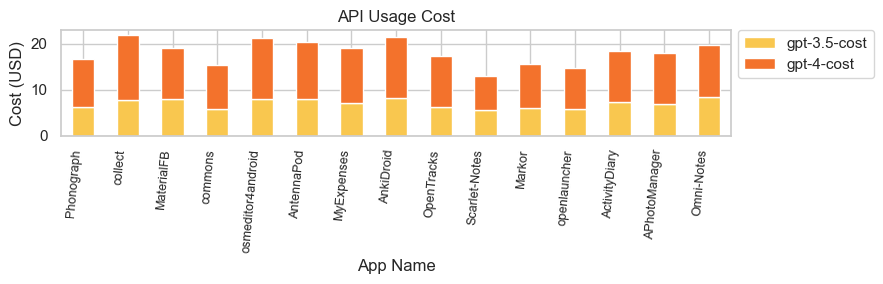

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(9, 3))
# stacked bar chart (gpt-3.5 + gpt-4)


usage_df.plot.bar(x='app_name', y=['gpt-3.5-cost', 'gpt-4-cost'], stacked=True, ax=ax, color=['#f9c74f', '#f3722c'], legend='reverse')
ax.set_ylabel('Cost (USD)')
ax.set_xlabel('App Name')

# add xticks rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=85, horizontalalignment='right', fontsize=9)
# legend position outside right 
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

plt.title('API Usage Cost')
plt.tight_layout()
plt.savefig('./figures/RQ4_cost.pdf')

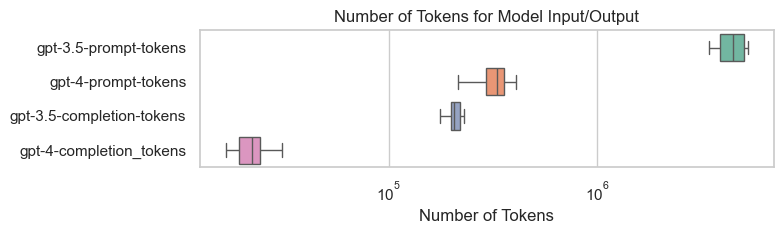

In [12]:
# boxplot of number of tokens 

fig, ax = plt.subplots(figsize=(8, 2.5))

usage_df['gpt-3.5-prompt-tokens'] = usage_df['gpt-3.5-prompt-tokens'] + usage_df['gpt-3.5-16k-prompt-tokens']
usage_df['gpt-3.5-completion-tokens'] = usage_df['gpt-3.5-completion-tokens'] + usage_df['gpt-3.5-16k-completion-tokens']

# horizontal box plot (log scale)
# without flier
sns.boxplot(data=usage_df[['gpt-3.5-prompt-tokens', 'gpt-4-prompt-tokens', 'gpt-3.5-completion-tokens', 'gpt-4-completion_tokens']], orient="h", palette="Set2", ax=ax, flierprops=dict(markerfacecolor='0.50', markersize=0, linestyle='none'))
plt.xscale('log')
ax.set_xlabel('Number of Tokens')
plt.title('Number of Tokens for Model Input/Output')
plt.tight_layout()
# save 
plt.savefig('./figures/RQ4_tokens.pdf')